In [107]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
import nest_asyncio
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<h1>Data Initialization</h1>
<h3>Append all 11 scrape results</h3>

In [40]:
#Read all 11 scrape
df1 = pd.read_csv('tokopedia_data.csv')
df2 = pd.read_csv('tokopedia_data_2.csv')
df3 = pd.read_csv('tokopedia_data_3.csv')
df4 = pd.read_csv('tokopedia_data_4.csv')
df5 = pd.read_csv('tokopedia_data_5.csv')
df6 = pd.read_csv('tokopedia_data_6.csv')
df7 = pd.read_csv('tokopedia_data_7.csv')
df8 = pd.read_csv('tokopedia_data_8.csv')
df9 = pd.read_csv('tokopedia_data_9.csv')
df10 = pd.read_csv('tokopedia_data_10.csv')
df11 = pd.read_csv('tokopedia_data_11.csv')

In [41]:
#Concatanate vertically
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11], ignore_index=True, sort=False)

In [42]:
df_tokopedia = df.copy()
df_tokopedia

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,five_star,four_star,three_star,two_star,one_star
0,Al-Quran Ash-Shahib ORI A5 - Merah,5,Buku,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,Terjual 2 rb+,Rp75.000,Rp75.000,657,25,4,0,0
1,MASKER ANAK KF94 KOREA KIDS FACE MASK KF 94 AN...,4.9,Fashion Anak & Bayi,Jakarta Barat,99%,https://images.tokopedia.net/img/cache/500-squ...,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,Terjual 10 rb+,Rp6.500,Rp5.000,1621,104,9,1,3
2,Otogard GOLD LINE Wiper Fluid Concentrate,4.9,Otomotif,Jakarta Selatan,97%,https://images.tokopedia.net/img/cache/500-squ...,- Cairan konsentrat yang berfungsi untuk membe...,Terjual 4 rb+,Rp72.000,Rp36.000,2339,145,34,4,24
3,Detick 1ml 2ml Obat Kutu Tetes Anjing Kucing 1...,4.9,Perawatan Hewan,Kab. Tangerang,98%,https://images.tokopedia.net/img/cache/500-squ...,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,Terjual 10 rb+,Rp24.000,Rp16.950,1161,76,15,1,6
4,Bebek Kloset Ekstra Kuat 450mL,4.8,Pertukangan,Gudang Terdekat,96%,https://images.tokopedia.net/img/cache/500-squ...,Bebek Kloset merupakan pembersih kloset yang m...,Terjual 5 rb+,Rp21.500,Rp18.920,1102,57,21,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,Safety Traffic Cone / Kerucut Lalu Lintas Tona...,5,Pertukangan,Kab. Tangerang,99%,https://images.tokopedia.net/img/cache/500-squ...,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,Terjual 10 rb+,Rp88.000,Rp88.000,1453,51,4,1,1
5045,PAKET COD (PENTING),5,Buku,Kab. Bandung Barat,100,https://images.tokopedia.net/img/cache/500-squ...,Untuk Info silahka Banyak produk yang bisa di...,Terjual 8 rb+,Rp1.000,Rp1.000,29,0,0,0,0
5046,Game Boy Retro FC 400 in 1 Gameboy Mini Gamepa...,4.8,Gaming,Kota Tangerang,95%,https://images.tokopedia.net/img/cache/500-squ...,Link Gameboy + Stick : https://www.tokopedia.c...,Terjual 10 rb+,Rp72.500,Rp72.500,1654,104,46,10,21
5047,SENDOK TEH ISI 12 PCS - STAINLESS STEEL,4.9,Dapur,Jakarta Barat,96%,https://images.tokopedia.net/img/cache/500-squ...,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,Terjual 1 rb+,Rp8.000,Rp8.000,229,18,6,1,1


In [11]:
df_tokopedia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          5029 non-null   object 
 1   rating                5029 non-null   float64
 2   category              5029 non-null   object 
 3   from_where            5029 non-null   object 
 4   satisfaction_rate     5029 non-null   object 
 5   img_link              5029 non-null   object 
 6   description           5029 non-null   object 
 7   amount_sold           5029 non-null   object 
 8   original_price        5029 non-null   object 
 9   product_price         5029 non-null   object 
 10  five_star             5029 non-null   object 
 11  four_star             5029 non-null   int64  
 12  three_star            5029 non-null   int64  
 13  two_star              5029 non-null   int64  
 14  one_star              5029 non-null   int64  
 15  cleaned_description  

In [53]:
df_tokopedia.drop_duplicates(subset=['product_name'], inplace=True)
df_tokopedia.duplicated(subset=['product_name']).sum()

0

<h1>Rating Fix</h1>

In [9]:
df_tokopedia['rating'].value_counts()

4.9    2533
5      1635
4.8     584
4.7     133
4.6      47
0        41
5.0      26
4.5      10
4         8
4.4       5
4.3       3
4.2       2
3.8       1
3.5       1
Name: rating, dtype: int64

In [10]:
df_tokopedia.loc[df_tokopedia['rating'] == 'No Rating', 'rating'] = '0'
display(df_tokopedia.iloc[[4045]]['rating'][4045])
df_tokopedia['rating'] = pd.to_numeric(df_tokopedia['rating'])

'5'

<h2>Satisfaction Rate Fix</h2>

In [190]:
df_tokopedia.loc[df_tokopedia['satisfaction_rate'] == '100', 'satisfaction_rate'] = '100%'
# display(df_tokopedia.iloc[[5045]]['satisfaction_rate'][5045])

'100%'

<h2>Description Pre-Processing</h2>

<b>Cleaning, Tokenizing, Removing Stop Words, Stemming the description</b>

In [45]:
df_tokopedia['cleaned_description'] = [str(x).lower() for x in df_tokopedia['description']]

In [46]:
df_tokopedia['cleaned_description'] = [re.sub(r"www.\S+", " ", str(x)) for x in df_tokopedia['cleaned_description']]
df_tokopedia['cleaned_description'] = [re.sub(r"http\S+", " ", str(x)) for x in df_tokopedia['cleaned_description']]
df_tokopedia['cleaned_description'] = [re.sub("[^a-zA-Z0-9]", " ", str(x)) for x in df_tokopedia['cleaned_description']]
df_tokopedia['cleaned_description'] = [re.sub("\s\s+", " ", str(x)) for x in df_tokopedia['cleaned_description']]

df_tokopedia[['description','cleaned_description']]

,description,cleaned_description
0,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,perhatian semua buku di toko harga buku origin...
1,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,masker earloop kf94 anaksudah izin kemenkes ri...
2,- Cairan konsentrat yang berfungsi untuk membe...,cairan konsentrat yang berfungsi untuk member...
3,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,detick 1ml 2ml obat kutu tetes anjing kucing h...
4,Bebek Kloset merupakan pembersih kloset yang m...,bebek kloset merupakan pembersih kloset yang m...
...,...,...
5044,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,ready stock tonata rubber cone 1 8 kgsspesifik...
5045,Untuk Info silahka Banyak produk yang bisa di...,untuk info silahka banyak produk yang bisa di ...
5046,Link Gameboy + Stick : https://www.tokopedia.c...,link gameboy stick stick nya saja 5 warna hite...
5047,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,sendok teh isi 12 pcs panjang 14cmstainless steel


In [47]:
df_tokopedia['cleaned_description'] = df_tokopedia.apply(lambda row: word_tokenize(row['cleaned_description']), axis=1)
df_tokopedia[['description', 'cleaned_description']]

,description,cleaned_description
0,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,"[perhatian, semua, buku, di, toko, harga, buku..."
1,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,"[masker, earloop, kf94, anaksudah, izin, kemen..."
2,- Cairan konsentrat yang berfungsi untuk membe...,"[cairan, konsentrat, yang, berfungsi, untuk, m..."
3,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,"[detick, 1ml, 2ml, obat, kutu, tetes, anjing, ..."
4,Bebek Kloset merupakan pembersih kloset yang m...,"[bebek, kloset, merupakan, pembersih, kloset, ..."
...,...,...
5044,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,"[ready, stock, tonata, rubber, cone, 1, 8, kgs..."
5045,Untuk Info silahka Banyak produk yang bisa di...,"[untuk, info, silahka, banyak, produk, yang, b..."
5046,Link Gameboy + Stick : https://www.tokopedia.c...,"[link, gameboy, stick, stick, nya, saja, 5, wa..."
5047,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,"[sendok, teh, isi, 12, pcs, panjang, 14cmstain..."


In [48]:
nltk.download('stopwords')
stop_words = set(stopwords.words("indonesian"))
df_tokopedia['cleaned_description'] = df_tokopedia['cleaned_description'].apply(lambda row: [word for word in row if word not in stop_words])
df_tokopedia[['description', 'cleaned_description']]

[nltk_data] Downloading package stopwords to C:\Users\Kenny
[nltk_data]     Jinhiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,description,cleaned_description
0,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,"[perhatian, buku, toko, harga, buku, original,..."
1,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,"[masker, earloop, kf94, anaksudah, izin, kemen..."
2,- Cairan konsentrat yang berfungsi untuk membe...,"[cairan, konsentrat, berfungsi, membersihan, k..."
3,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,"[detick, 1ml, 2ml, obat, kutu, tetes, anjing, ..."
4,Bebek Kloset merupakan pembersih kloset yang m...,"[bebek, kloset, pembersih, kloset, mengandung,..."
...,...,...
5044,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,"[ready, stock, tonata, rubber, cone, 1, 8, kgs..."
5045,Untuk Info silahka Banyak produk yang bisa di...,"[info, silahka, produk, beli]"
5046,Link Gameboy + Stick : https://www.tokopedia.c...,"[link, gameboy, stick, stick, nya, 5, warna, h..."
5047,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,"[sendok, teh, isi, 12, pcs, 14cmstainless, steel]"


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df_tokopedia['cleaned_description'] = df_tokopedia['cleaned_description'].apply(lambda row: stemmer.stem(' '.join(word for word in row)).split())
df_tokopedia[['description', 'cleaned_description']]

<h1>Title Pre-Processing</h1>

In [ ]:
df_tokopedia['cleaned_product_name'] = [str(x).lower() for x in df_tokopedia['product_name']]

In [ ]:
df_tokopedia['cleaned_product_name'] = [re.sub(r"www.\S+", " ", str(x)) for x in df_tokopedia['cleaned_product_name']]
df_tokopedia['cleaned_product_name'] = [re.sub(r"http\S+", " ", str(x)) for x in df_tokopedia['cleaned_product_name']]
df_tokopedia['cleaned_product_name'] = [re.sub("[^a-zA-Z0-9]", " ", str(x)) for x in df_tokopedia['cleaned_product_name']]
df_tokopedia['cleaned_product_name'] = [re.sub("\s\s+", " ", str(x)) for x in df_tokopedia['cleaned_product_name']]

df_tokopedia[['product_name','cleaned_product_name']]

In [ ]:
df_tokopedia['cleaned_product_name'] = df_tokopedia.apply(lambda row: word_tokenize(row['cleaned_product_name']), axis=1)
df_tokopedia[['product_name', 'cleaned_product_name']]

In [ ]:
df_tokopedia['cleaned_product_name'] = df_tokopedia['cleaned_product_name'].apply(lambda row: [word for word in row if word not in stop_words])
df_tokopedia[['product_name', 'cleaned_product_name']]

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df_tokopedia['cleaned_product_name'] = df_tokopedia['cleaned_product_name'].apply(lambda row: stemmer.stem(' '.join(word for word in row)).split())
df_tokopedia[['product_name', 'cleaned_product_name']]

<h2>Category Pre-processing</h2>

In [147]:
df_tokopedia['category']

0                      Buku
1       Fashion Anak & Bayi
2                  Otomotif
3           Perawatan Hewan
4               Pertukangan
               ...         
5044            Pertukangan
5045                   Buku
5046                 Gaming
5047                  Dapur
5048                 Gaming
Name: category, Length: 5029, dtype: object

In [174]:
df_tokopedia['tagged_category'] = 'kategori-'+df_tokopedia['category'].str.lower()

In [175]:
df_tokopedia['tagged_category'] = df_tokopedia['tagged_category'].str.replace(' ', '')

In [176]:
df_tokopedia['tagged_category'] = df_tokopedia['tagged_category'].str.replace('&', '-')
df_tokopedia['tagged_category']

0                   kategori-buku
1       kategori-fashionanak-bayi
2               kategori-otomotif
3         kategori-perawatanhewan
4            kategori-pertukangan
                  ...            
5044         kategori-pertukangan
5045                kategori-buku
5046              kategori-gaming
5047               kategori-dapur
5048              kategori-gaming
Name: tagged_category, Length: 5049, dtype: object

In [177]:
df_tokopedia

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,five_star,four_star,three_star,two_star,one_star,cleaned_description,cleaned_product_name,tagged_category
0,Al-Quran Ash-Shahib ORI A5 - Merah,5,Buku,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,Terjual 2 rb+,Rp75.000,Rp75.000,657,25,4,0,0,perhati buku toko harga buku original asli lan...,al quran ash shahib ori a5 merah,kategori-buku
1,MASKER ANAK KF94 KOREA KIDS FACE MASK KF 94 AN...,4.9,Fashion Anak & Bayi,Jakarta Barat,99%,https://images.tokopedia.net/img/cache/500-squ...,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,Terjual 10 rb+,Rp6.500,Rp5.000,1621,104,9,1,3,masker earloop kf94 anaksudah izin kemenkes ri...,masker anak kf94 korea kids face mask kf 94 an...,kategori-fashionanak-bayi
2,Otogard GOLD LINE Wiper Fluid Concentrate,4.9,Otomotif,Jakarta Selatan,97%,https://images.tokopedia.net/img/cache/500-squ...,- Cairan konsentrat yang berfungsi untuk membe...,Terjual 4 rb+,Rp72.000,Rp36.000,2339,145,34,4,24,cair konsentrat fungsi bersih kaca noda kotor ...,otogard gold line wiper fluid concentrate,kategori-otomotif
3,Detick 1ml 2ml Obat Kutu Tetes Anjing Kucing 1...,4.9,Perawatan Hewan,Kab. Tangerang,98%,https://images.tokopedia.net/img/cache/500-squ...,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,Terjual 10 rb+,Rp24.000,Rp16.950,1161,76,15,1,6,detick 1ml 2ml obat kutu tetes anjing kucing h...,detick 1ml 2ml obat kutu tetes anjing kucing 1...,kategori-perawatanhewan
4,Bebek Kloset Ekstra Kuat 450mL,4.8,Pertukangan,Gudang Terdekat,96%,https://images.tokopedia.net/img/cache/500-squ...,Bebek Kloset merupakan pembersih kloset yang m...,Terjual 5 rb+,Rp21.500,Rp18.920,1102,57,21,6,17,bebek kloset bersih kloset kandung germinex bu...,bebek kloset ekstra kuat 450ml,kategori-pertukangan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,Safety Traffic Cone / Kerucut Lalu Lintas Tona...,5,Pertukangan,Kab. Tangerang,99%,https://images.tokopedia.net/img/cache/500-squ...,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,Terjual 10 rb+,Rp88.000,Rp88.000,1453,51,4,1,1,ready stock tonata rubber cone 1 8 kgsspesifik...,safety traffic cone kerucut lintas tonata 1 8 ...,kategori-pertukangan
5045,PAKET COD (PENTING),5,Buku,Kab. Bandung Barat,100,https://images.tokopedia.net/img/cache/500-squ...,Untuk Info silahka Banyak produk yang bisa di...,Terjual 8 rb+,Rp1.000,Rp1.000,29,0,0,0,0,info silahka produk beli,paket cod,kategori-buku
5046,Game Boy Retro FC 400 in 1 Gameboy Mini Gamepa...,4.8,Gaming,Kota Tangerang,95%,https://images.tokopedia.net/img/cache/500-squ...,Link Gameboy + Stick : https://www.tokopedia.c...,Terjual 10 rb+,Rp72.500,Rp72.500,1654,104,46,10,21,link gameboy stick stick nya 5 warna hitem mer...,game boy retro fc 400 in 1 gameboy mini gamepa...,kategori-gaming
5047,SENDOK TEH ISI 12 PCS - STAINLESS STEEL,4.9,Dapur,Jakarta Barat,96%,https://images.tokopedia.net/img/cache/500-squ...,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,Terjual 1 rb+,Rp8.000,Rp8.000,229,18,6,1,1,sendok teh isi 12 pcs 14cmstainless steel,sendok teh isi 12 pcs stainless steel,kategori-dapur


<h2>From_where Pre-Processing</h2>

In [198]:
df_tokopedia['tagged_location'] = 'lokasi-'+df_tokopedia['from_where'].str.lower()

In [199]:
df_tokopedia['tagged_location'] = df_tokopedia['tagged_location'].str.replace(' ', '')

In [200]:
df_tokopedia['tagged_location']

0           lokasi-jakartatimur
1           lokasi-jakartabarat
2         lokasi-jakartaselatan
3          lokasi-kab.tangerang
4         lokasi-gudangterdekat
                 ...           
5044       lokasi-kab.tangerang
5045    lokasi-kab.bandungbarat
5046       lokasi-kotatangerang
5047        lokasi-jakartabarat
5048          lokasi-kotabekasi
Name: tagged_location, Length: 5049, dtype: object

<h2>Finalizing list to string</h2>

In [ ]:
df_tokopedia['cleaned_product_name'] = df_tokopedia['cleaned_product_name'].apply(eval).apply(' '.join)
df_tokopedia['cleaned_description'] = df_tokopedia['cleaned_description'].apply(eval).apply(' '.join)

In [203]:
df_tokopedia['product_tag'] = df_tokopedia['cleaned_description'] + df_tokopedia['cleaned_product_name'] + df_tokopedia['tagged_category'] + df_tokopedia['tagged_location']
df_tokopedia

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,five_star,four_star,three_star,two_star,one_star,cleaned_description,cleaned_product_name,tagged_category,tagged_location,product_tag
0,Al-Quran Ash-Shahib ORI A5 - Merah,5,Buku,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,Terjual 2 rb+,Rp75.000,Rp75.000,657,25,4,0,0,perhati buku toko harga buku original asli lan...,al quran ash shahib ori a5 merah,kategori-buku,lokasi-jakartatimur,perhati buku toko harga buku original asli lan...
1,MASKER ANAK KF94 KOREA KIDS FACE MASK KF 94 AN...,4.9,Fashion Anak & Bayi,Jakarta Barat,99%,https://images.tokopedia.net/img/cache/500-squ...,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,Terjual 10 rb+,Rp6.500,Rp5.000,1621,104,9,1,3,masker earloop kf94 anaksudah izin kemenkes ri...,masker anak kf94 korea kids face mask kf 94 an...,kategori-fashionanak-bayi,lokasi-jakartabarat,masker earloop kf94 anaksudah izin kemenkes ri...
2,Otogard GOLD LINE Wiper Fluid Concentrate,4.9,Otomotif,Jakarta Selatan,97%,https://images.tokopedia.net/img/cache/500-squ...,- Cairan konsentrat yang berfungsi untuk membe...,Terjual 4 rb+,Rp72.000,Rp36.000,2339,145,34,4,24,cair konsentrat fungsi bersih kaca noda kotor ...,otogard gold line wiper fluid concentrate,kategori-otomotif,lokasi-jakartaselatan,cair konsentrat fungsi bersih kaca noda kotor ...
3,Detick 1ml 2ml Obat Kutu Tetes Anjing Kucing 1...,4.9,Perawatan Hewan,Kab. Tangerang,98%,https://images.tokopedia.net/img/cache/500-squ...,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,Terjual 10 rb+,Rp24.000,Rp16.950,1161,76,15,1,6,detick 1ml 2ml obat kutu tetes anjing kucing h...,detick 1ml 2ml obat kutu tetes anjing kucing 1...,kategori-perawatanhewan,lokasi-kab.tangerang,detick 1ml 2ml obat kutu tetes anjing kucing h...
4,Bebek Kloset Ekstra Kuat 450mL,4.8,Pertukangan,Gudang Terdekat,96%,https://images.tokopedia.net/img/cache/500-squ...,Bebek Kloset merupakan pembersih kloset yang m...,Terjual 5 rb+,Rp21.500,Rp18.920,1102,57,21,6,17,bebek kloset bersih kloset kandung germinex bu...,bebek kloset ekstra kuat 450ml,kategori-pertukangan,lokasi-gudangterdekat,bebek kloset bersih kloset kandung germinex bu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,Safety Traffic Cone / Kerucut Lalu Lintas Tona...,5,Pertukangan,Kab. Tangerang,99%,https://images.tokopedia.net/img/cache/500-squ...,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,Terjual 10 rb+,Rp88.000,Rp88.000,1453,51,4,1,1,ready stock tonata rubber cone 1 8 kgsspesifik...,safety traffic cone kerucut lintas tonata 1 8 ...,kategori-pertukangan,lokasi-kab.tangerang,ready stock tonata rubber cone 1 8 kgsspesifik...
5045,PAKET COD (PENTING),5,Buku,Kab. Bandung Barat,100%,https://images.tokopedia.net/img/cache/500-squ...,Untuk Info silahka Banyak produk yang bisa di...,Terjual 8 rb+,Rp1.000,Rp1.000,29,0,0,0,0,info silahka produk beli,paket cod,kategori-buku,lokasi-kab.bandungbarat,info silahka produk belipaket codkategori-buku...
5046,Game Boy Retro FC 400 in 1 Gameboy Mini Gamepa...,4.8,Gaming,Kota Tangerang,95%,https://images.tokopedia.net/img/cache/500-squ...,Link Gameboy + Stick : https://www.tokopedia.c...,Terjual 10 rb+,Rp72.500,Rp72.500,1654,104,46,10,21,link gameboy stick stick nya 5 warna hitem mer...,game boy retro fc 400 in 1 gameboy mini gamepa...,kategori-gaming,lokasi-kotatangerang,link gameboy stick stick nya 5 warna hitem mer...
5047,SENDOK TEH ISI 12 PCS - STAINLESS STEEL,4.9,Dapur,Jakarta Barat,96%,https://images.tokopedia.net/img/cache/500-squ...,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,Terjual 1 rb+,Rp8.000,Rp8.000,229,18,6,1,1,sendok teh isi 12 pcs 14cmstainless steel,sendok teh isi 12 pcs stainless steel,kategori-dapur,lokasi-jakartabarat,sendok teh isi 12 pcs 14cmstainless steelsendo...


In [12]:
df_tokopedia.to_csv('df_tokopedia_clean.csv', index=False)

<h1>EDA</h1>

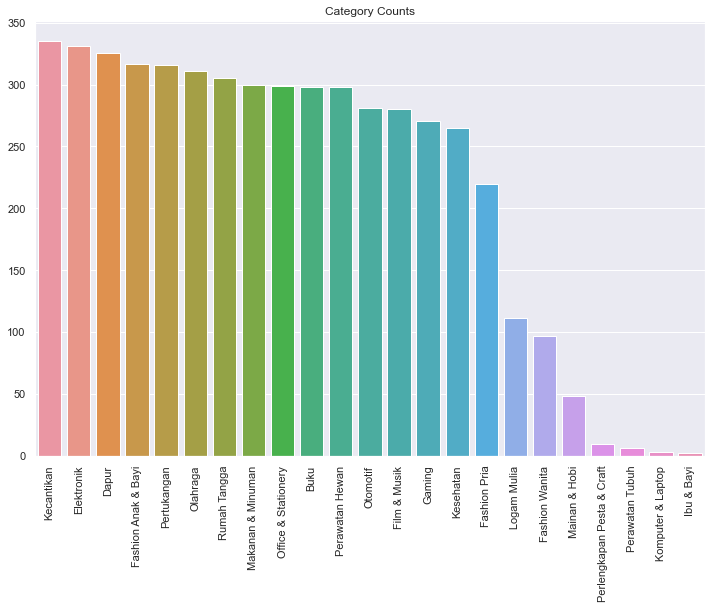

In [91]:
df_categories = df_tokopedia['category'].value_counts().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=df_categories.index, y=df_categories.values.tolist()).set(title='Category Counts')
plt.xticks(rotation=90)
plt.show()

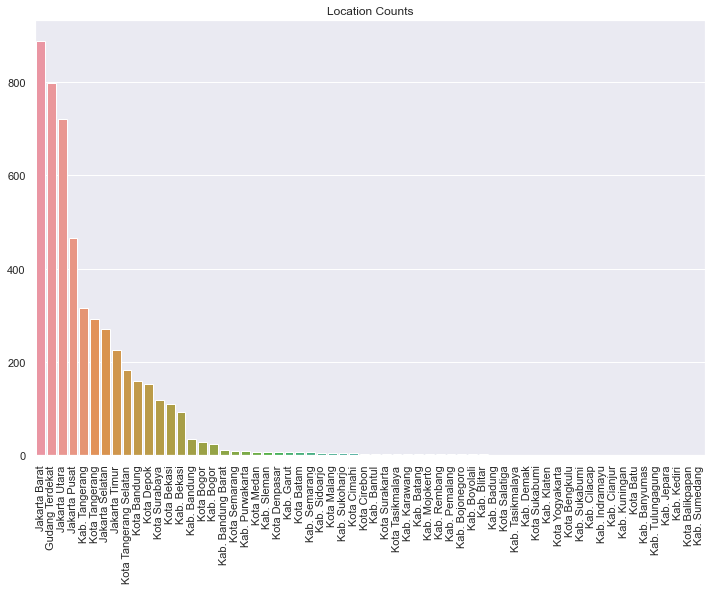

In [92]:
df_location = df_tokopedia['from_where'].value_counts().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(12,8)})
plot = sns.barplot(x=df_location.index, y=df_location.values.tolist()).set(title='Location Counts')
plt.xticks(rotation=90)
plt.show()

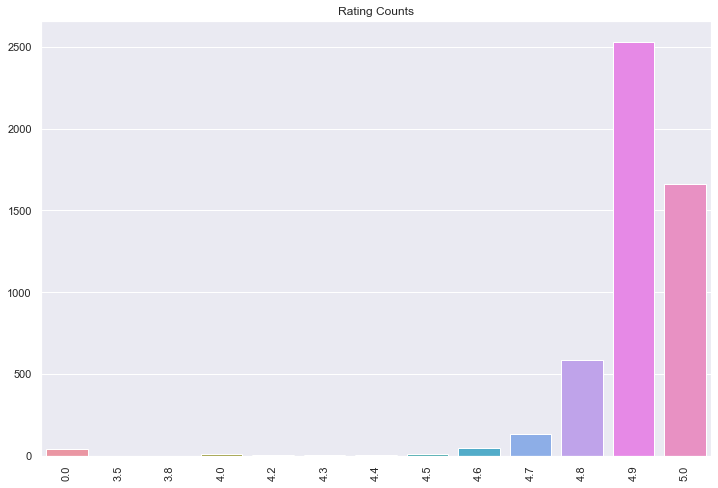

In [70]:
df_rating = df_tokopedia['rating'].value_counts().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=df_rating.index, y=df_rating.values.tolist()).set(title='Rating Counts')
plt.xticks(rotation=90)
plt.show()

In [73]:
df_tokopedia['rating'].describe()

count    5029.000000
mean        4.869517
std         0.451792
min         0.000000
25%         4.900000
50%         4.900000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

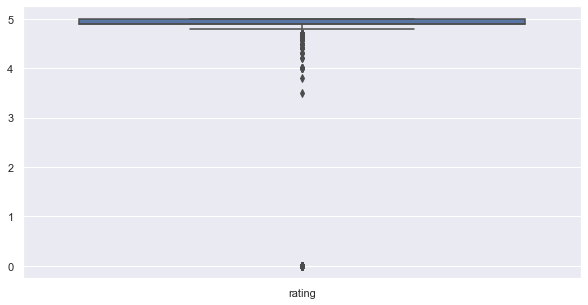

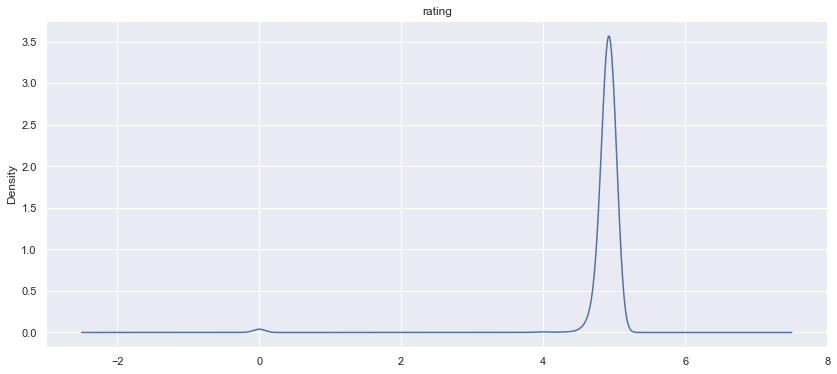

In [77]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_tokopedia.loc[:,['rating']]).plot(ax=ax)
plt.show()
df_tokopedia['rating'].plot(title='rating', kind='density', figsize=(14,6))
plt.show()

<h2>Product Description WordCloud</h2>

In [121]:
words = []
for row in df_tokopedia.itertuples(index=True, name='Pandas'):
    for word in row.cleaned_description.split():
        words.append(word)
vec = CountVectorizer().fit(words)
bag_of_words = vec.transform(words)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:20])

[('produk', 3896), ('kirim', 3645), ('warna', 2853), ('barang', 2685), ('bahan', 2344), ('ukur', 2218), ('cm', 2081), ('mudah', 2041), ('beli', 1922), ('sesuai', 1682), ('and', 1623), ('pakai', 1617), ('terima', 1571), ('air', 1530), ('kulit', 1495), ('pilih', 1485), ('jam', 1449), ('anak', 1440), ('isi', 1434), ('the', 1404)]


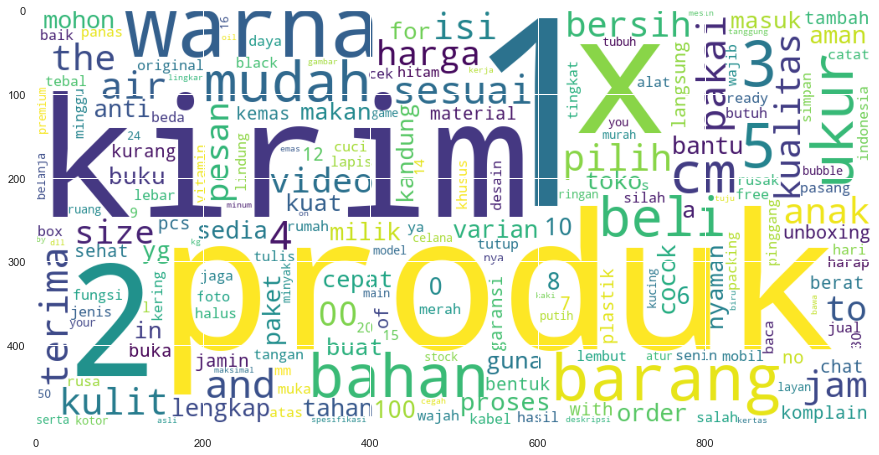

In [120]:
word_could_dict=Counter(words)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

<h2>Product Name WordCloud</h2>

In [124]:
words = []
for row in df_tokopedia.itertuples(index=True, name='Pandas'):
    for word in row.cleaned_product_name.split():
        words.append(word)
vec = CountVectorizer().fit(words)
bag_of_words = vec.transform(words)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:20])

CountVectorizer()

[('anak', 385), ('hitam', 356), ('original', 209), ('anti', 204), ('putih', 197), ('isi', 185), ('black', 168), ('kucing', 166), ('buku', 165), ('makan', 163), ('pcs', 145), ('air', 141), ('10', 140), ('gr', 139), ('ml', 134), ('biru', 129), ('100', 129), ('alat', 126), ('set', 125), ('gitar', 124)]


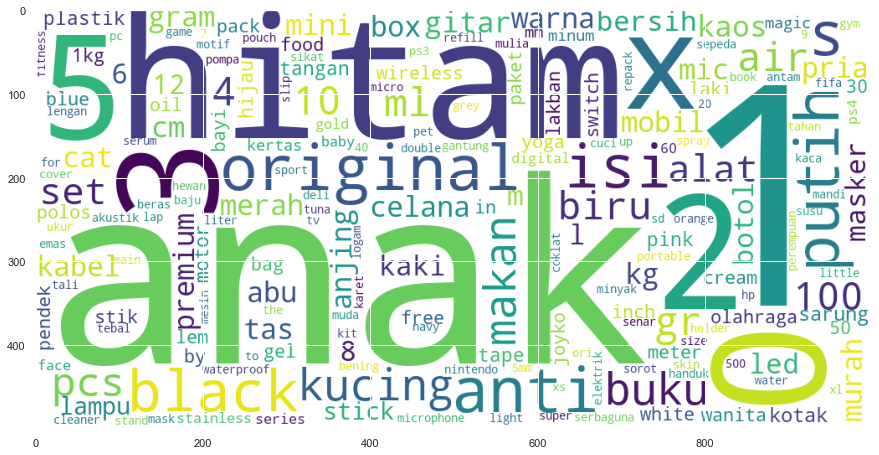

In [123]:
word_could_dict=Counter(words)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [129]:
cv = CountVectorizer(analyzer='word')
description_vector = cv.fit_transform(df_tokopedia['cleaned_description'])
df_description_count = pd.DataFrame(description_vector.toarray(), columns=cv.get_feature_names())
display(df_description_count)

C:\Users\Kenny Jinhiro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00000,000112informasi,000112nb,00018,00019,0002,00020,00021,...,zt102a,zte,ztto,zumba,zuzhu,zwap,zweig,zwitsal,zyrcon,zz
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# generate the frequent item set that will be use to create the rule with min_support=0.1 and max_len=4
frequent_items = apriori(df_description_count, use_colnames=True, min_support=0.1,max_len=4)

# generate the rule using lift metrics with minimum threshold=1
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

# # filter the result so that we will only get the consequents Attrition_NO
# target = '{\'Attrition_No\'}'
# results_attrition_no = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_attrition_no = rules[rules['consequents'].astype(str).str].sort_values(by='confidence', ascending=False)
results_attrition_no.head()

C:\Users\Kenny Jinhiro\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 5

<h1>Vectorize</h1>

In [2]:
df_tokopedia = pd.read_csv('df_tokopedia_clean.csv')
df_tokopedia

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,five_star,four_star,three_star,two_star,one_star,cleaned_description,cleaned_product_name,tagged_category,tagged_location,product_tag
0,Al-Quran Ash-Shahib ORI A5 - Merah,5,Buku,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,Terjual 2 rb+,Rp75.000,Rp75.000,657,25,4,0,0,perhati buku toko harga buku original asli lan...,al quran ash shahib ori a5 merah,kategori-buku,lokasi-jakartatimur,perhati buku toko harga buku original asli lan...
1,MASKER ANAK KF94 KOREA KIDS FACE MASK KF 94 AN...,4.9,Fashion Anak & Bayi,Jakarta Barat,99%,https://images.tokopedia.net/img/cache/500-squ...,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,Terjual 10 rb+,Rp6.500,Rp5.000,1621,104,9,1,3,masker earloop kf94 anaksudah izin kemenkes ri...,masker anak kf94 korea kids face mask kf 94 an...,kategori-fashionanak-bayi,lokasi-jakartabarat,masker earloop kf94 anaksudah izin kemenkes ri...
2,Otogard GOLD LINE Wiper Fluid Concentrate,4.9,Otomotif,Jakarta Selatan,97%,https://images.tokopedia.net/img/cache/500-squ...,- Cairan konsentrat yang berfungsi untuk membe...,Terjual 4 rb+,Rp72.000,Rp36.000,2339,145,34,4,24,cair konsentrat fungsi bersih kaca noda kotor ...,otogard gold line wiper fluid concentrate,kategori-otomotif,lokasi-jakartaselatan,cair konsentrat fungsi bersih kaca noda kotor ...
3,Detick 1ml 2ml Obat Kutu Tetes Anjing Kucing 1...,4.9,Perawatan Hewan,Kab. Tangerang,98%,https://images.tokopedia.net/img/cache/500-squ...,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,Terjual 10 rb+,Rp24.000,Rp16.950,1161,76,15,1,6,detick 1ml 2ml obat kutu tetes anjing kucing h...,detick 1ml 2ml obat kutu tetes anjing kucing 1...,kategori-perawatanhewan,lokasi-kab.tangerang,detick 1ml 2ml obat kutu tetes anjing kucing h...
4,Bebek Kloset Ekstra Kuat 450mL,4.8,Pertukangan,Gudang Terdekat,96%,https://images.tokopedia.net/img/cache/500-squ...,Bebek Kloset merupakan pembersih kloset yang m...,Terjual 5 rb+,Rp21.500,Rp18.920,1102,57,21,6,17,bebek kloset bersih kloset kandung germinex bu...,bebek kloset ekstra kuat 450ml,kategori-pertukangan,lokasi-gudangterdekat,bebek kloset bersih kloset kandung germinex bu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,Safety Traffic Cone / Kerucut Lalu Lintas Tona...,5,Pertukangan,Kab. Tangerang,99%,https://images.tokopedia.net/img/cache/500-squ...,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,Terjual 10 rb+,Rp88.000,Rp88.000,1453,51,4,1,1,ready stock tonata rubber cone 1 8 kgsspesifik...,safety traffic cone kerucut lintas tonata 1 8 ...,kategori-pertukangan,lokasi-kab.tangerang,ready stock tonata rubber cone 1 8 kgsspesifik...
5025,PAKET COD (PENTING),5,Buku,Kab. Bandung Barat,100%,https://images.tokopedia.net/img/cache/500-squ...,Untuk Info silahka Banyak produk yang bisa di...,Terjual 8 rb+,Rp1.000,Rp1.000,29,0,0,0,0,info silahka produk beli,paket cod,kategori-buku,lokasi-kab.bandungbarat,info silahka produk belipaket codkategori-buku...
5026,Game Boy Retro FC 400 in 1 Gameboy Mini Gamepa...,4.8,Gaming,Kota Tangerang,95%,https://images.tokopedia.net/img/cache/500-squ...,Link Gameboy + Stick : https://www.tokopedia.c...,Terjual 10 rb+,Rp72.500,Rp72.500,1654,104,46,10,21,link gameboy stick stick nya 5 warna hitem mer...,game boy retro fc 400 in 1 gameboy mini gamepa...,kategori-gaming,lokasi-kotatangerang,link gameboy stick stick nya 5 warna hitem mer...
5027,SENDOK TEH ISI 12 PCS - STAINLESS STEEL,4.9,Dapur,Jakarta Barat,96%,https://images.tokopedia.net/img/cache/500-squ...,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,Terjual 1 rb+,Rp8.000,Rp8.000,229,18,6,1,1,sendok teh isi 12 pcs 14cmstainless steel,sendok teh isi 12 pcs stainless steel,kategori-dapur,lokasi-jakartabarat,sendok teh isi 12 pcs 14cmstainless steelsendo...


In [204]:
df_tokopedia.dropna(inplace=True)
df_tokopedia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5029 entries, 0 to 5048
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_name          5029 non-null   object
 1   rating                5029 non-null   object
 2   category              5029 non-null   object
 3   from_where            5029 non-null   object
 4   satisfaction_rate     5029 non-null   object
 5   img_link              5029 non-null   object
 6   description           5029 non-null   object
 7   amount_sold           5029 non-null   object
 8   original_price        5029 non-null   object
 9   product_price         5029 non-null   object
 10  five_star             5029 non-null   object
 11  four_star             5029 non-null   int64 
 12  three_star            5029 non-null   int64 
 13  two_star              5029 non-null   int64 
 14  one_star              5029 non-null   int64 
 15  cleaned_description   5029 non-null   

In [15]:
def recommend(product_name):
    tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,6), min_df=0)
    product_index = df_tokopedia[df_tokopedia['product_name'] == product_name].index[0]

    tfidf_product_tag_vector = tfidf_vectorizer.fit_transform(df_tokopedia['product_tag'])
    product_tag_query = df_tokopedia.iloc[[product_index]]['product_tag'][product_index]
    product_query_vector = tfidf_vectorizer.transform([product_tag_query])
    product_similarity = cosine_similarity(product_query_vector, tfidf_product_tag_vector).flatten()

    # product_indices = np.argpartition(product_name_description_similarity, -1)[-1:]
    # product_indices = np.argpartition(product_name_similarity, -5)[-5:]
    product_indices = np.argpartition(product_similarity, -10)[-10:]
    product_results = df_tokopedia.iloc[product_indices].sort_values(by='rating', ascending=False)
    # product_name_
    return product_results

In [16]:
recommend('MS Glow Face Wash | Sabun Wajah MS Glow MSGlow')

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,five_star,four_star,three_star,two_star,one_star,cleaned_description,cleaned_product_name,tagged_category,tagged_location,product_tag
1259,Glow & Lovely Facial Wash Multivitamin Glow Pe...,5.0,Kecantikan,Gudang Terdekat,99%,https://images.tokopedia.net/img/cache/500-squ...,NOTE : Kemungkinan Anda akan menerima kemasan ...,Terjual 2 rb+,Rp34.680,Rp27.046,1024,33,1,0,0,note terima kemas manfaat wajah bersih cerah w...,glow lovely facial wash multivitamin glow cera...,kategori-kecantikan,lokasi-gudangterdekat,note terima kemas manfaat wajah bersih cerah w...
2955,SKINTIFIC 5% AHA BHA PHA Exfoliating Toner - 80ml,5.0,Kecantikan,Gudang Terdekat,99%,https://images.tokopedia.net/img/cache/500-squ...,Kulit bersih dan tampak lebih bersinar dengan ...,Terjual 2 rb+,Rp159.000,Rp109.000,944,30,3,0,3,kulit bersih sinar skintific 5 aha bha pha exf...,skintific 5 aha bha pha exfoliating toner 80ml,kategori-kecantikan,lokasi-gudangterdekat,kulit bersih sinar skintific 5 aha bha pha exf...
3447,Clean & Clear Foaming Face Wash Sabun Cuci Muk...,5.0,Kecantikan,Gudang Terdekat,99%,https://images.tokopedia.net/img/cache/500-squ...,ED : UNTIL 2024CLEAN&CLEAR® Sabun Cuci Muka FO...,Terjual 7 rb+,Rp21.200,Rp18.700,1693,42,10,0,2,ed until 2024clean clear sabun cuci muka foami...,clean clear foaming face wash sabun cuci muka ...,kategori-kecantikan,lokasi-gudangterdekat,ed until 2024clean clear sabun cuci muka foami...
3283,His Erha Booster Facial Wash 100g - Sabun Muka...,5.0,Kecantikan,Jakarta Barat,99%,https://images.tokopedia.net/img/cache/500-squ...,*Produk ERHA terdaftar HALAL oleh MUI dengan n...,Terjual 10 rb+,Rp70.560,Rp62.093,6653,244,23,11,4,produk erha daftar halal mui no registrasi 001...,his erha booster facial wash 100g sabun muka c...,kategori-kecantikan,lokasi-jakartabarat,produk erha daftar halal mui no registrasi 001...
1644,Night Cream MS Glow | Cream Malam Krim Malam M...,4.9,Kecantikan,Gudang Terdekat,98%,https://images.tokopedia.net/img/cache/500-squ...,"""Daily Skincare Menu for your Skin 🍉🍋⁣Semua ka...",Terjual 6 rb+,Rp85.000,Rp85.000,3101,175,38,5,10,daily skincare menu for your skin kandung baha...,night cream ms glow cream malam krim malam ms ...,kategori-kecantikan,lokasi-gudangterdekat,daily skincare menu for your skin kandung baha...
823,WHITELAB BRIGHTENING FACIAL WASH WHITE LAB SAB...,4.9,Kecantikan,Jakarta Utara,98%,https://images.tokopedia.net/img/cache/500-squ...,BRAND : WHITELABVARIAN : BRIGHTENING FACIAL WA...,Terjual 1 rb+,Rp36.900,Rp36.000,696,39,4,2,2,brand whitelabvarian brightening facial washis...,whitelab brightening facial wash white lab sab...,kategori-kecantikan,lokasi-jakartautara,brand whitelabvarian brightening facial washis...
149,MS Glow Face Wash | Sabun Wajah MS Glow MSGlow,4.9,Kecantikan,Gudang Terdekat,99%,https://images.tokopedia.net/img/cache/500-squ...,Perpaduan Alpha Arbutin & Glycosphere Papain y...,Terjual 4 rb+,Rp60.000,Rp60.000,2479,100,13,1,3,padu alpha arbutin glycosphere papain efektif ...,ms glow face wash sabun wajah ms glow msglow,kategori-kecantikan,lokasi-gudangterdekat,padu alpha arbutin glycosphere papain efektif ...
2609,Shinzui Skin Lightening Facial Wash 80ml,4.9,Kecantikan,Gudang Terdekat,99%,https://images.tokopedia.net/img/cache/500-squ...,Shinzu'i Skin Lightening Facial Wash diformula...,Terjual 3 rb+,Rp27.800,Rp23.630,1184,67,10,0,1,shinzu i skin lightening facial wash formulasi...,shinzui skin lightening facial wash 80ml,kategori-kecantikan,lokasi-gudangterdekat,shinzu i skin lightening facial wash formulasi...
1870,LALULAKU Pembersih Wajah Silikon Sikat Wajah F...,4.9,Kecantikan,Jakarta Utara,96%,https://images.tokopedia.net/img/cache/500-squ...,Pembersih Wajah Silikon Alat Cuci Muka Sikat W...,Terjual 5 rb+,Rp11.000,Rp6.300,583,42,16,2,4,bersih wajah silikon alat cuci muka sikat waja...,lalulaku bersih wajah silikon sikat wajah faci...,kategori-keca